In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning

In [3]:
dataset_path = '/content/drive/MyDrive/Customer_Segmentation_Project/Data/Bronze Layer/data.csv'
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')
df.head(50)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create separate Date and Time columns
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['WeekDay'] = df['InvoiceDate'].dt.dayofweek
df['Quarter'] = df['InvoiceDate'].dt.quarter

df['Hour'] = df['InvoiceDate'].dt.hour
df.drop('InvoiceDate', axis=1, inplace=True)
# Display the updated DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Year,Month,WeekDay,Quarter,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
 7   Date         541909 non-null  object 
 8   Time         541909 non-null  object 
 9   Year         541909 non-null  int32  
 10  Month        541909 non-null  int32  
 11  WeekDay      541909 non-null  int32  
 12  Quarter      541909 non-null  int32  
 13  Hour         541909 non-null  int32  
dtypes: float64(2), int32(5), int64(1), object(6)
memory usage: 47.5+ MB


In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
UnitPrice,0
CustomerID,135080
Country,0
Date,0
Time,0
Year,0


In [8]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Year,Month,WeekDay,Quarter,Hour
622,536414,22139,NaN,56,0.00,NaN,United Kingdom,2010-12-01,11:52:00,2010,12,2,4,11
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01,14:32:00,2010,12,2,4,14
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01,14:32:00,2010,12,2,4,14
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01,14:32:00,2010,12,2,4,14
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01,14:32:00,2010,12,2,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,NaN,United Kingdom,2011-12-09,10:26:00,2011,12,4,4,10
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,NaN,United Kingdom,2011-12-09,10:26:00,2011,12,4,4,10
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,NaN,United Kingdom,2011-12-09,10:26:00,2011,12,4,4,10
541539,581498,85174,S/4 CACTI CANDLES,1,10.79,NaN,United Kingdom,2011-12-09,10:26:00,2011,12,4,4,10


['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


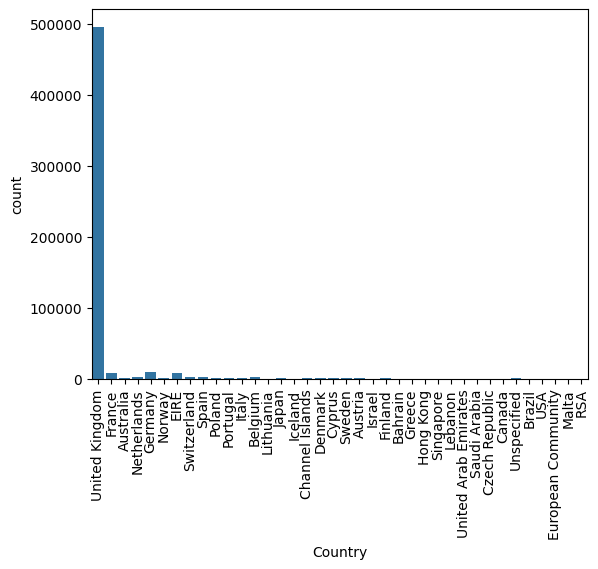

In [9]:
print(df['Country'].unique())
print(len(df['Country'].unique()))

sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)
plt.show()

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,WeekDay,Quarter,Hour
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,2010.921609,7.553128,2.431277,2.834723,13.078729
std,218.081158,96.759853,1713.600303,0.268787,3.509055,1.844709,1.137261,2.443270
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,0.000000,1.000000,6.000000
25%,1.000000,1.250000,13953.000000,2011.000000,5.000000,1.000000,2.000000,11.000000
50%,3.000000,2.080000,15152.000000,2011.000000,8.000000,2.000000,3.000000,13.000000
75%,10.000000,4.130000,16791.000000,2011.000000,11.000000,4.000000,4.000000,15.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,6.000000,4.000000,20.000000


In [11]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head()

'''Taking the UK data only as 95%+ sales is in UK. Moreover the marketing startegy for different regions will be different as the buying habits will be different'''

'Taking the UK data only as 95%+ sales is in UK. Moreover the marketing startegy for different regions will be different as the buying habits will be different'

In [13]:
df_uk.describe()


,Quantity,UnitPrice,CustomerID,Year,Month,WeekDay,Quarter,Hour
count,495478.000000,495478.000000,361878.000000,495478.000000,495478.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,15547.871368,2010.919018,7.572732,2.436056,2.840209,13.170865
std,227.588756,99.315438,1594.402590,0.272808,3.520091,1.860363,1.138694,2.425462
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,0.000000,1.000000,6.000000
25%,1.000000,1.250000,14194.000000,2011.000000,5.000000,1.000000,2.000000,11.000000
50%,3.000000,2.100000,15514.000000,2011.000000,8.000000,2.000000,3.000000,13.000000
75%,10.000000,4.130000,16931.000000,2011.000000,11.000000,4.000000,4.000000,15.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,6.000000,4.000000,20.000000


In [14]:
df_uk.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
UnitPrice,0
CustomerID,133600
Country,0
Date,0
Time,0
Year,0


In [15]:
df_uk.dropna(subset=['CustomerID'], how='all', inplace=True)
df_uk.shape

<ipython-input-15-87440149eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.dropna(subset=['CustomerID'], how='all', inplace=True)


(361878, 14)

In [16]:
df_uk.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
CustomerID,0
Country,0
Date,0
Time,0
Year,0


In [17]:
df_uk.drop(df_uk[df_uk['Quantity'] < 0].index, inplace=True)

<ipython-input-17-007ded462b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.drop(df_uk[df_uk['Quantity'] < 0].index, inplace=True)


In [18]:
df_uk['Revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']
df_uk.drop_duplicates(inplace=True)

<ipython-input-18-8ad6eabac857>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']
<ipython-input-18-8ad6eabac857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk.drop_duplicates(inplace=True)


In [19]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,WeekDay,Quarter,Hour,Revenue
count,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625,2010.932826,7.635163,2.633768,2.862639,12.803704,20.860428
std,191.797470,17.990307,1594.403077,0.250324,3.416509,1.951522,1.120697,2.246193,328.406035
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,0.000000,1.000000,6.000000,0.000000
25%,2.000000,1.250000,14191.000000,2011.000000,5.000000,1.000000,2.000000,11.000000,4.200000
50%,4.000000,1.950000,15518.000000,2011.000000,9.000000,2.000000,3.000000,13.000000,10.200000
75%,12.000000,3.750000,16931.000000,2011.000000,11.000000,4.000000,4.000000,14.000000,17.850000
max,80995.000000,8142.750000,18287.000000,2011.000000,12.000000,6.000000,4.000000,20.000000,168469.600000


In [20]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Year,Month,WeekDay,Quarter,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,2,4,8,20.34


In [21]:
df_uk.to_csv('/content/drive/MyDrive/Customer_Segmentation_Project/Data/Gold Layer/uk_data.csv', index=False)

'''Saving the final dataset in another safe location'''

'Saving the final dataset in another safe location'

# EXPLORATORY DATA ANALYSIS (EDA)

Examining the data price distributinon for the products for the retail client. Most of the products have price between the 0-100

<ipython-input-22-9a757de7cc04>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_uk['UnitPrice'], shade=True)


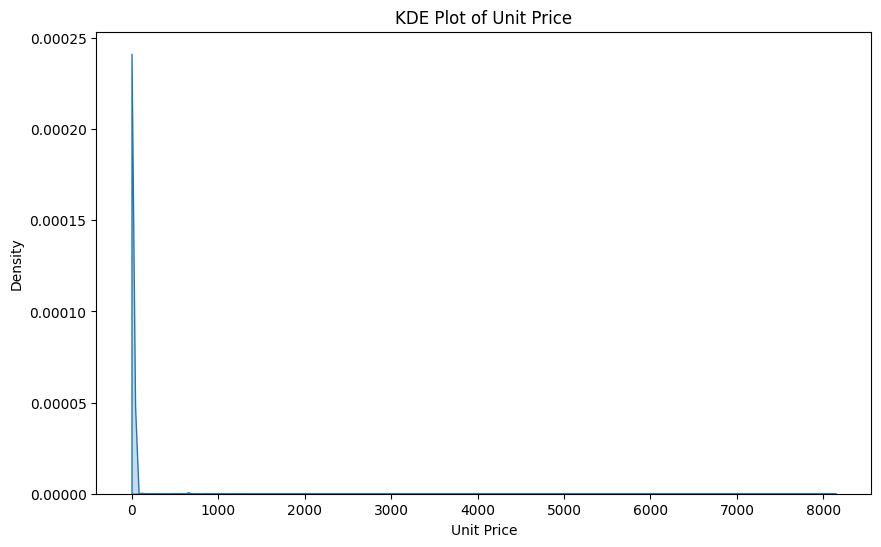

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_uk['UnitPrice'], shade=True)
plt.title('KDE Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()



Examining the top selling items by revenue and quantity

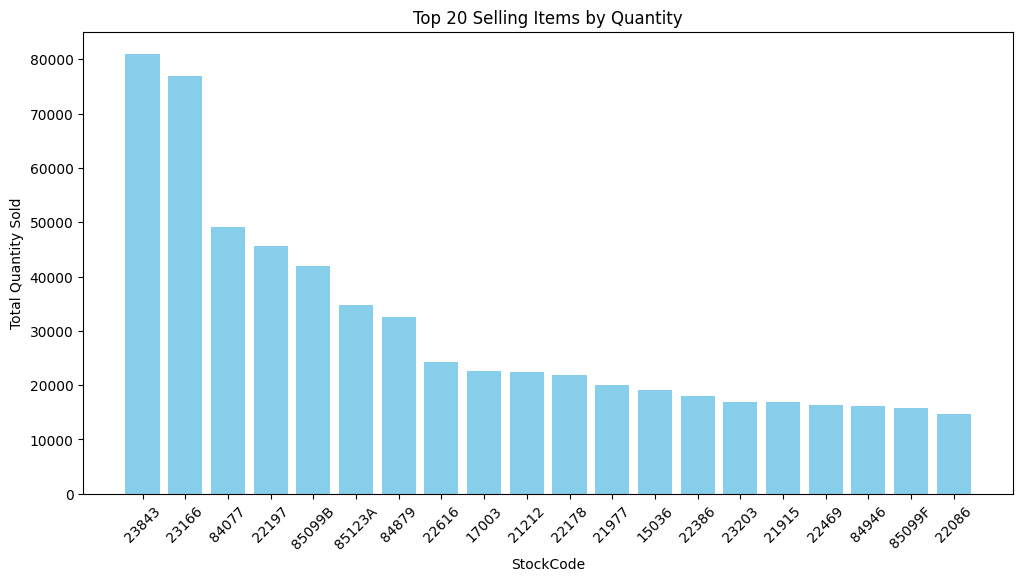

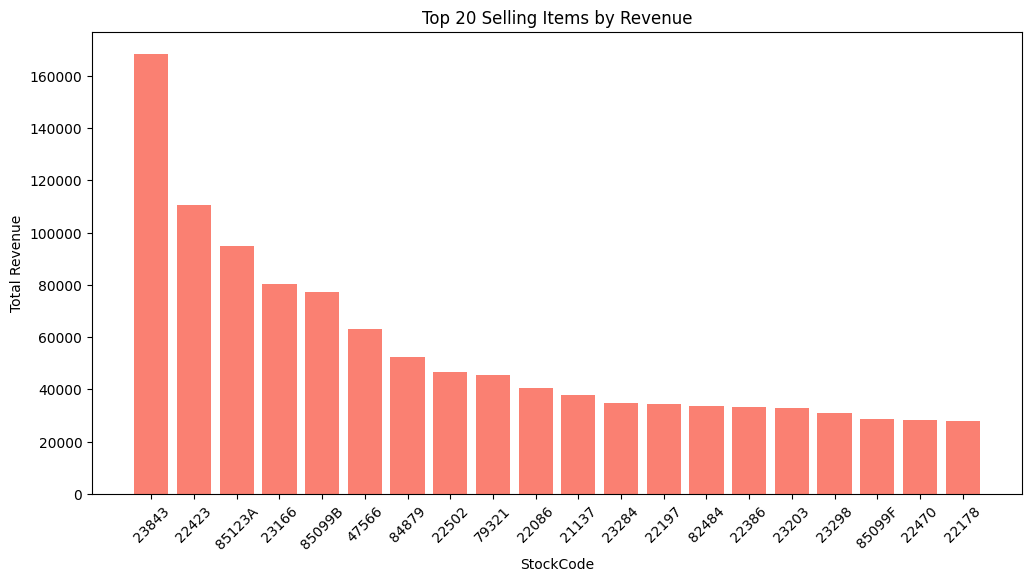

In [23]:

# Group by StockCode and aggregate Quantity and Revenue
stock_summary = df_uk.groupby('StockCode').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

# Top 20 items by Quantity
top_quantity = stock_summary.nlargest(20, 'Quantity')

# Top 20 items by Revenue
top_revenue = stock_summary.nlargest(20, 'Revenue')

# Plot Top 20 by Quantity
plt.figure(figsize=(12, 6))
plt.bar(top_quantity['StockCode'], top_quantity['Quantity'], color='skyblue')
plt.title('Top 20 Selling Items by Quantity')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Plot Top 20 by Revenue
plt.figure(figsize=(12, 6))
plt.bar(top_revenue['StockCode'], top_revenue['Revenue'], color='salmon')
plt.title('Top 20 Selling Items by Revenue')
plt.xlabel('StockCode')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Comparind the only december revenue for the client for 2010 and 2011. As we saw a sharp decrease in Dec revenue in 2011. Since we dont have the data previous to december 2010 so we compared only december revenue to check if the last year revenue was around the same figure

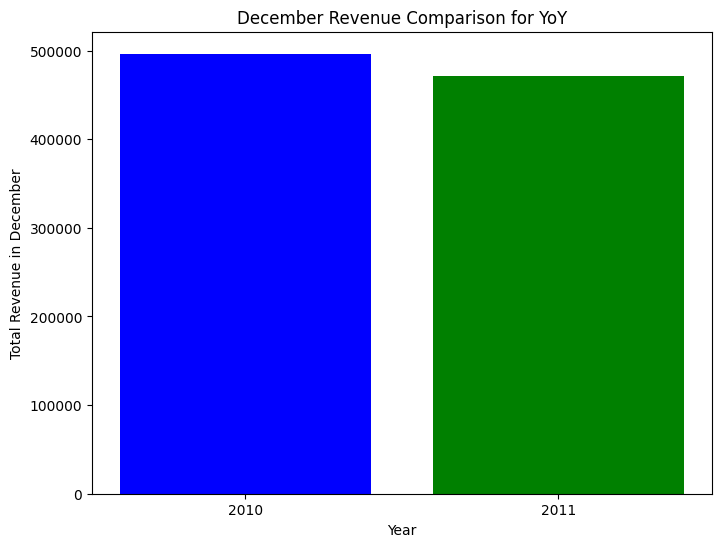

In [24]:
# Filter data for the 12th month (December) only
december_revenue = df_uk[df_uk['Month'] == 12].groupby('Year')['Revenue'].sum().reset_index()

# Plotting December revenue for 2010 and 2011
plt.figure(figsize=(8, 6))
plt.bar(december_revenue['Year'], december_revenue['Revenue'], color=['blue', 'green'])
plt.title('December Revenue Comparison for YoY')
plt.xlabel('Year')
plt.ylabel('Total Revenue in December')
plt.xticks(december_revenue['Year'])
plt.show()

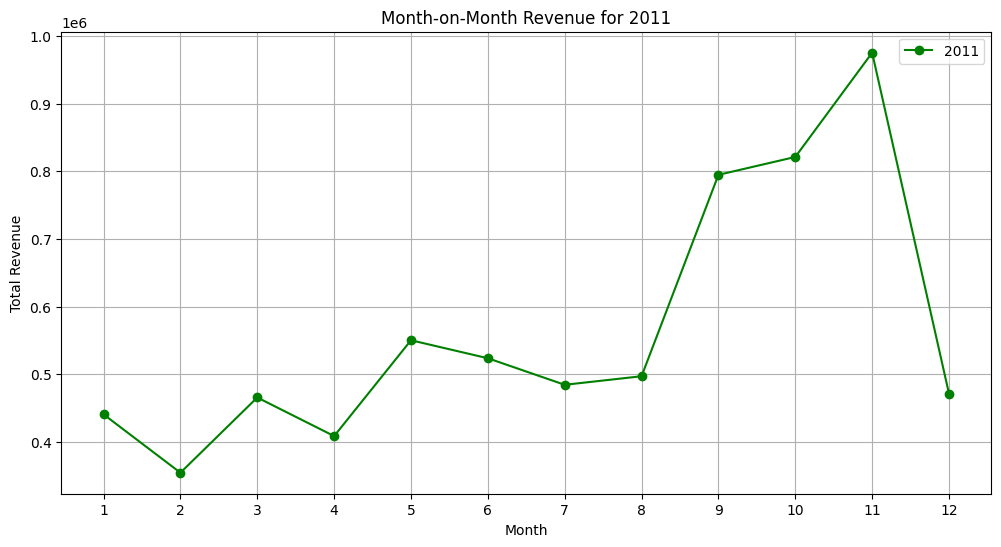

In [25]:
# Assuming 'df' is your dataset with 'Year', 'Month', and 'Revenue' columns
# Group by Year and Month to calculate monthly revenue
monthly_revenue = df_uk.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()

# Separate data for 2010 and 2011
revenue_2010 = monthly_revenue[monthly_revenue['Year'] == 2010]
revenue_2011 = monthly_revenue[monthly_revenue['Year'] == 2011]

# Plotting
plt.figure(figsize=(12, 6))


# Plot 2011 monthly revenue
plt.plot(revenue_2011['Month'], revenue_2011['Revenue'], marker='o', linestyle='-', color='green', label='2011')

# Add titles and labels
plt.title('Month-on-Month Revenue for 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))  # Setting x-axis ticks for each month
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [26]:
print(df_uk['WeekDay'].unique())


[2 3 4 6 0 1]


This was done to verify the sales for the weekday. We can see that Saturday sales is 0. This is interesting. Also sunday sales is quiet low. What can we do to improve the sunday sales. also the sales are max between 9 am -3 pm

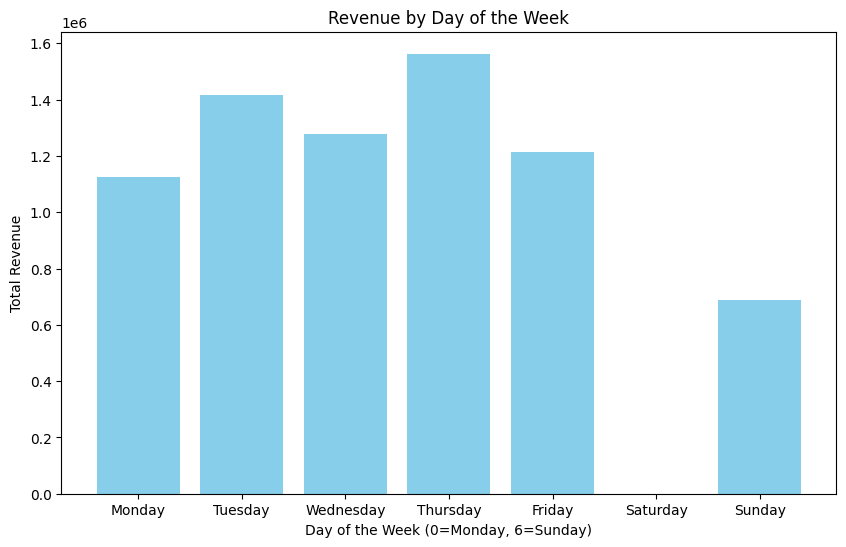

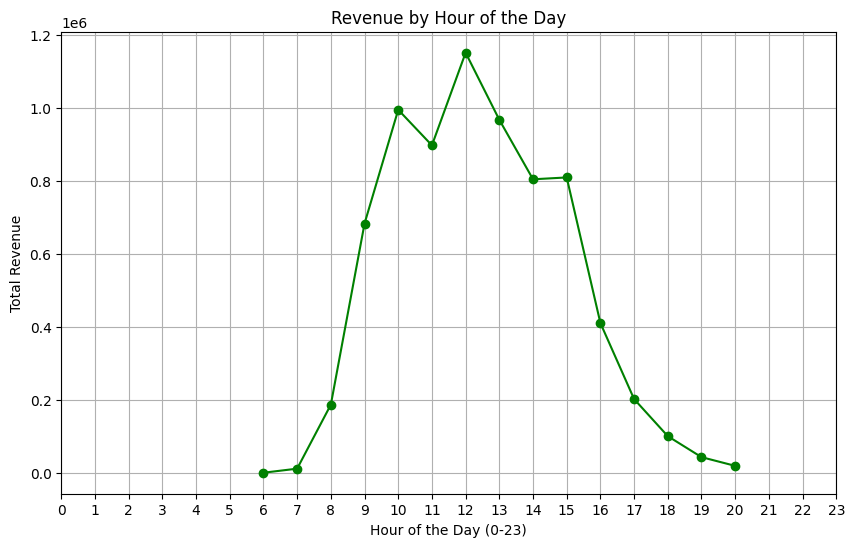

In [27]:
# Calculate revenue by weekday
weekday_revenue = df_uk.groupby('WeekDay')['Revenue'].sum().reset_index()

# Plot revenue by weekday
plt.figure(figsize=(10, 6))
plt.bar(weekday_revenue['WeekDay'], weekday_revenue['Revenue'], color='skyblue')
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Calculate revenue by hour
hourly_revenue = df_uk.groupby('Hour')['Revenue'].sum().reset_index()

# Plot revenue by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_revenue['Hour'], hourly_revenue['Revenue'], marker='o', linestyle='-', color='green')
plt.title('Revenue by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Total Revenue')
plt.xticks(range(0, 24))  # Show each hour on x-axis
plt.grid(True)
plt.show()